In [1]:
#import check_rl_zoo
import numpy as np

In [2]:
#import importlib
#importlib.reload(check_rl_zoo)

In [7]:
import requests
from bs4 import BeautifulSoup

def find_github_subdirs(url):
    start_string = "https://github.com"
    html_text = requests.get(url).text
    soup = BeautifulSoup(html_text, 'html.parser')
    links = soup.find_all('a')
    subdirs = []
    subdir_links = []
    for link in links:
        if link["href"][0:len(url) - len(start_string)] == url[len(start_string):len(url)]:
            subdir_links.append(start_string + link["href"])
            subdirs.append(link["href"][(len(url) - len(start_string)):len(link["href"])])
    return subdir_links, subdirs


def download_file(url, download_path):
    # url += "?raw=true"
    r = requests.get(url)
    print(r.headers.get('content-type'))
    if not r.status_code == 404:
        with open(download_path, 'wb') as f:
            f.write(r.content)
    else:
        print('404 error!')

In [4]:
url ='https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922'

In [8]:
links,dir_names = find_github_subdirs(url)

In [9]:
links

['https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/a2c',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ars',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ddpg',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/dqn',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/her',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ppo',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/qrdqn',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/sac',
 'https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/td3',
 'https://github.com/

In [10]:
dir_names

['',
 '/a2c',
 '/ars',
 '/ddpg',
 '/dqn',
 '/her',
 '/ppo',
 '/qrdqn',
 '/sac',
 '/td3',
 '/tqc',
 '/trpo']

In [11]:
#download test
download_path = 'C:\\Users\\Denis\\Downloads\\rl_zoo_evals.npz'
#test_url = url+dir_names[6]+"/LunarLanderContinuous-v2_1/"+"evaluations.npz"

import re
modified_url = test_url.replace("github.com","raw.github.com")
modified_url_2 = re.sub(pattern="tree/([a-z]|[A-Z]|[0-9])*/",repl="master/",string=modified_url)
modified_url,modified_url_2

In [12]:
def calc_statistics(eval):
    stats = {}
    if 'timesteps' in eval.keys():
      stats['steps']=eval['timesteps']
    if 'results' in eval.keys():
      stats['results_mean'] = np.mean(eval['results'],axis=1)
      stats['results_std'] = np.std(eval['results'],axis=1)
    if 'ep_lengths' in eval.keys():
      stats['ep_lengths_std']=np.std(eval['ep_lengths'],axis=1)
      stats['ep_lengths_mean']=np.mean(eval['ep_lengths'],axis=1)
    return stats

In [13]:
statistics = {}
import re
true_links = [re.sub(pattern="tree/([a-z]|[A-Z]|[0-9])*/",repl="master/",string=(l+'/LunarLanderContinuous-v2_1/evaluations.npz').replace("github.com","raw.github.com")) for l in links]
for i,link in enumerate(true_links):
    download_file(link,download_path)
    with np.load(download_path) as ev:
        statistics[dir_names[i]]=calc_statistics(ev)

text/plain; charset=utf-8
404 error!
application/octet-stream
application/octet-stream
application/octet-stream
text/plain; charset=utf-8
404 error!
text/plain; charset=utf-8
404 error!
application/octet-stream
text/plain; charset=utf-8
404 error!
application/octet-stream
application/octet-stream
application/octet-stream
application/octet-stream


In [14]:
statistics.keys()

dict_keys(['', '/a2c', '/ars', '/ddpg', '/dqn', '/her', '/ppo', '/qrdqn', '/sac', '/td3', '/tqc', '/trpo'])

In [15]:
for l in links:
    print(l)
true_links = [re.sub(pattern="tree/([a-z]|[A-Z]|[0-9])*/",repl="master/",string=(l+'/LunarLanderContinuous-v2_1/evaluations.npz').replace("github.com","raw.github.com")) for l in links]
for s in true_links:
    print(s)

https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/a2c
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ars
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ddpg
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/dqn
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/her
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/ppo
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/qrdqn
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/sac
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e8985e5382ee61f3542ee023ec81922/td3
https://github.com/DLR-RM/rl-trained-agents/tree/72feeb8c2e89

results for :
results for /a2c:
results for /ars:
results for /ddpg:
results for /dqn:
results for /her:
results for /ppo:
results for /qrdqn:
results for /sac:
results for /td3:
results for /tqc:
results for /trpo:


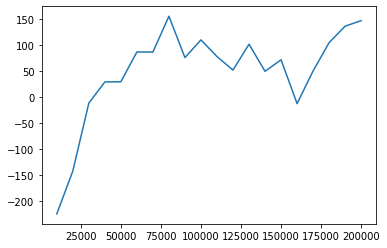

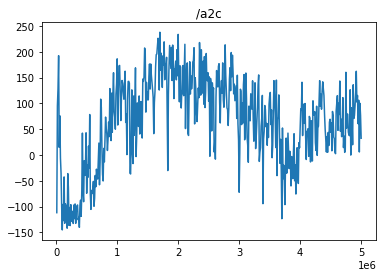

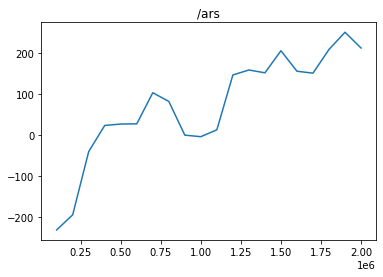

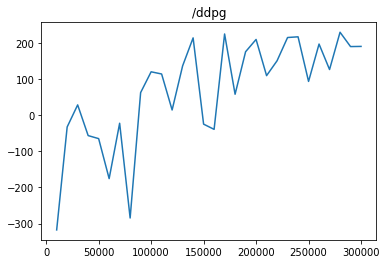

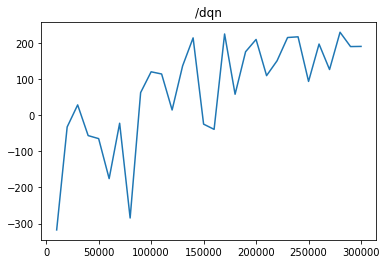

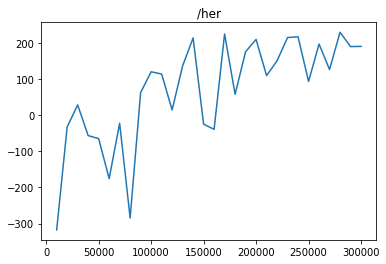

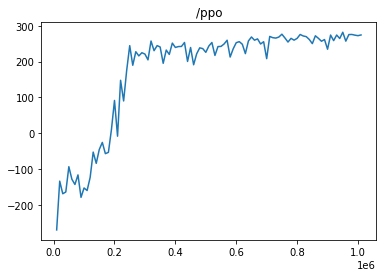

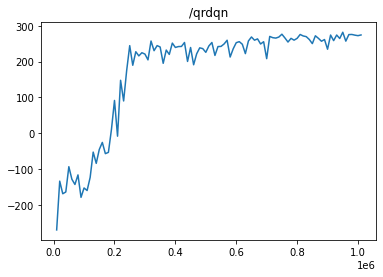

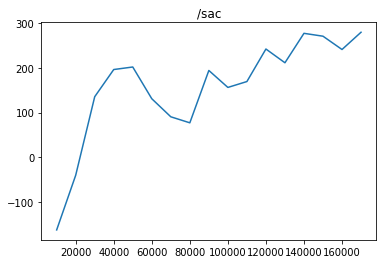

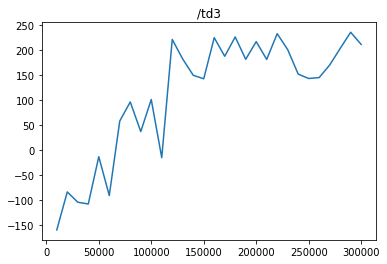

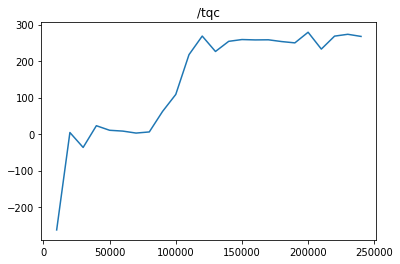

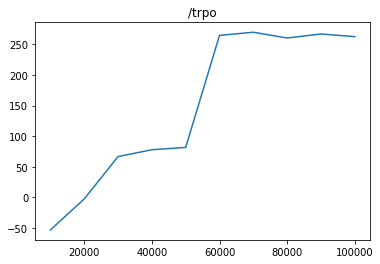

In [16]:
import matplotlib.pyplot as plt
for key in statistics.keys():
    print('results for '+key+':')
    if 'steps' in statistics[key].keys():
       fig,ax = plt.subplots()
       ax.set_title(key)
       ax.plot(statistics[key]['steps'],statistics[key]['results_mean'])
    else:
       print('steps unavailable!')
       results = statistics[key]['results_mean']

In [18]:
discr_stats = {}
import re
true_links = [re.sub(pattern="tree/([a-z]|[A-Z]|[0-9])*/",repl="master/",string=(l+'/LunarLander-v2_1/evaluations.npz').replace("github.com","raw.github.com")) for l in links]
for i,link in enumerate(true_links):
    download_file(link,download_path)
    with np.load(download_path) as ev:
        discr_stats[dir_names[i]]=calc_statistics(ev)

text/plain; charset=utf-8
404 error!
application/octet-stream
text/plain; charset=utf-8
404 error!
text/plain; charset=utf-8
404 error!
application/octet-stream
text/plain; charset=utf-8
404 error!
application/octet-stream
application/octet-stream
text/plain; charset=utf-8
404 error!
text/plain; charset=utf-8
404 error!
text/plain; charset=utf-8
404 error!
application/octet-stream


results for :
results for /a2c:
results for /ars:
results for /ddpg:
results for /dqn:
results for /her:
results for /ppo:
results for /qrdqn:
results for /sac:
results for /td3:
results for /tqc:
results for /trpo:


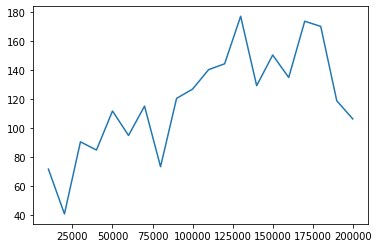

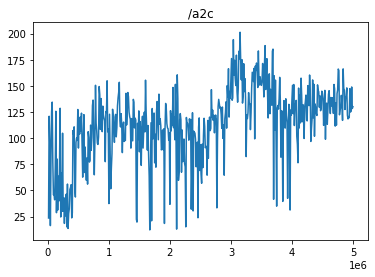

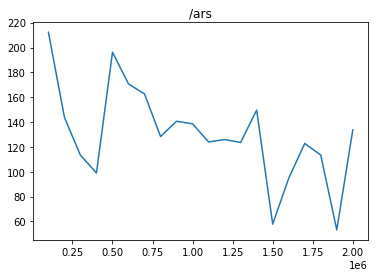

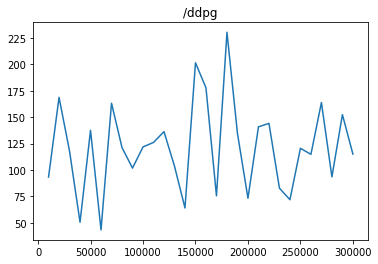

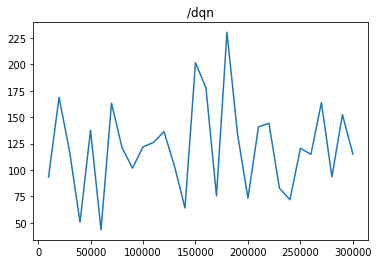

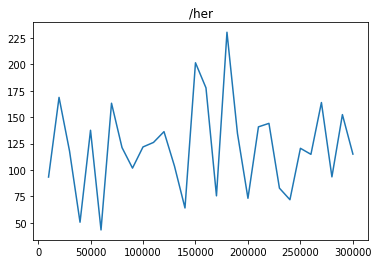

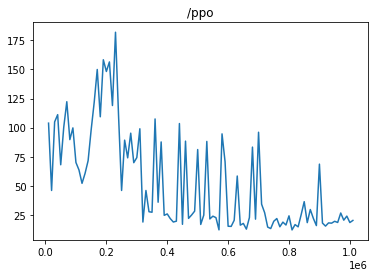

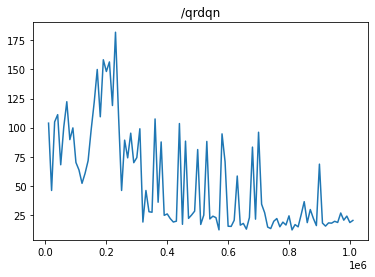

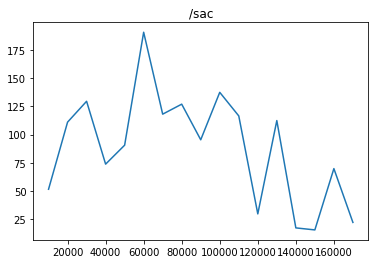

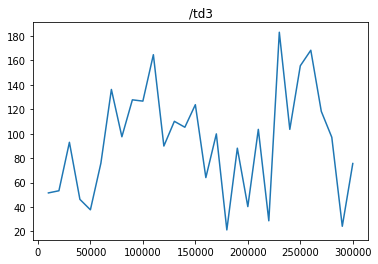

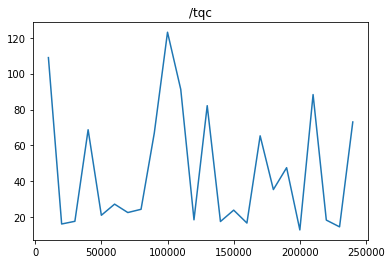

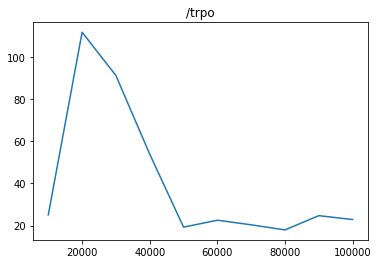

In [19]:
import matplotlib.pyplot as plt
for key in statistics.keys():
    print('results for '+key+':')
    if 'steps' in statistics[key].keys():
        fig,ax = plt.subplots()
        ax.set_title(key)
        ax.plot(statistics[key]['steps'],statistics[key]['results_std'])
    else:
        print('steps unavailable!')
        results = statistics[key]['results_mean']

In [20]:
statistics['/sac']['results_mean']

array([-162.2747784,  -40.124321 ,  135.5129351,  196.2808906,
        201.9287347,  130.990262 ,   90.6099289,   77.1509944,
        194.1803141,  156.269446 ,  169.4094908,  242.1346208,
        211.4031626,  277.1970073,  270.7831263,  241.0669109,
        279.635984 ])

In [26]:
statistics['/tqc']['results_mean']

array([-262.797796 ,    4.1476584,  -36.7484193,   22.7901214,
         10.2949482,    8.0253198,    2.6318646,    5.7457023,
         61.8335537,  108.5064248,  217.5344178,  268.4665988,
        226.2237392,  254.0357393,  258.9506927,  257.9578133,
        258.2662013,  253.4243383,  249.8313941,  278.9663507,
        232.8311118,  268.3191076,  273.3691373,  267.5085462])

results for :
results for /a2c:
results for /ars:
results for /ddpg:
results for /dqn:
results for /her:
results for /ppo:
results for /qrdqn:
results for /sac:
results for /td3:
results for /tqc:
results for /trpo:


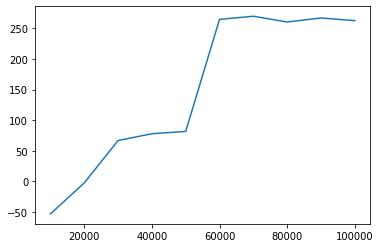

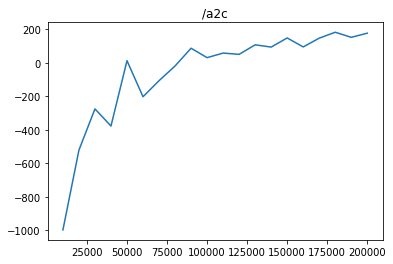

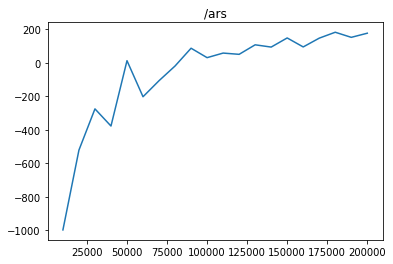

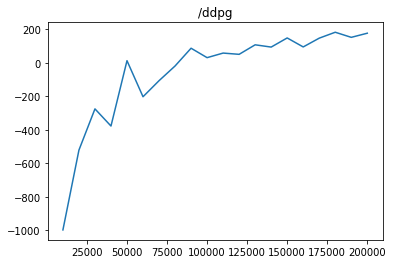

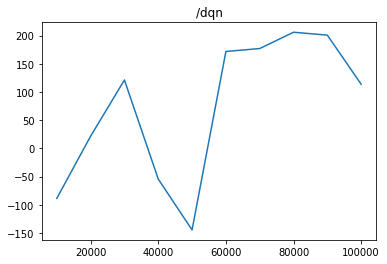

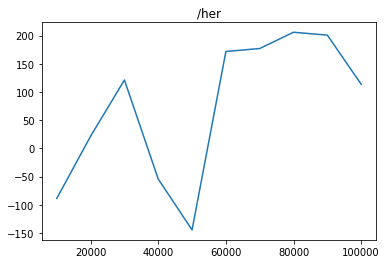

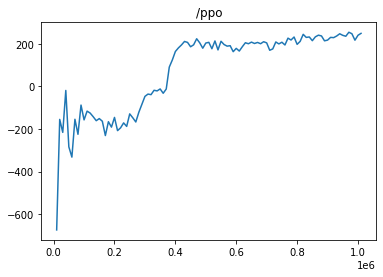

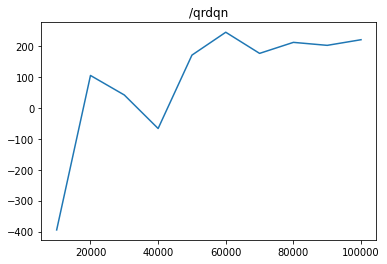

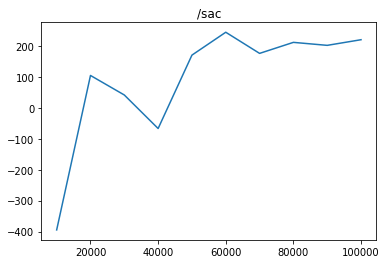

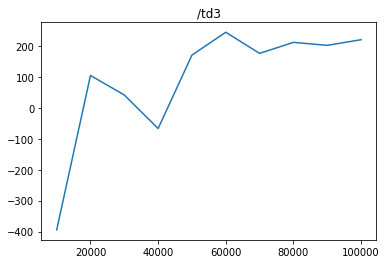

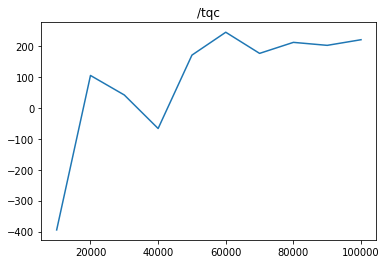

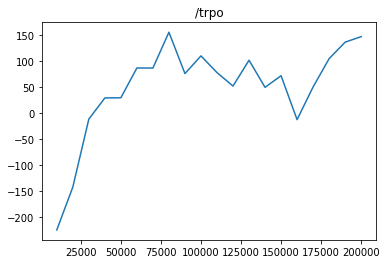

In [22]:
import matplotlib.pyplot as plt
for key in statistics.keys():
    print('results for '+key+':')
    if 'steps' in discr_stats[key].keys():
        fig,ax = plt.subplots()
        ax.set_title(key)
        ax.plot(discr_stats[key]['steps'],discr_stats[key]['results_mean'])
    else:
        print('steps unavailable!')
        results = statistics[key]['results_mean']

In [23]:
statistics['']

{'steps': array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
         90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,
        170000, 180000, 190000, 200000], dtype=int64),
 'results_mean': array([-224.2781266 , -141.8472954 ,  -10.9637313 ,   29.7326842 ,
          30.1200536 ,   87.44660925,   87.3113644 ,  156.2345042 ,
          76.6760221 ,  110.71862275,   78.60948425,   52.62966325,
         102.36915045,   50.2338656 ,   72.49227535,  -11.9565891 ,
          50.92194545,  105.4025576 ,  137.1743447 ,  147.72484085]),
 'results_std': array([ 71.62295665,  40.72564618,  90.41124784,  84.77760676,
        111.68486521,  94.82264717, 115.05079964,  73.26897975,
        120.37006585, 126.77690857, 140.17893897, 144.20733972,
        176.9964678 , 129.13816382, 150.25715855, 134.79176726,
        173.56193883, 169.99026908, 118.71731343, 106.21633124]),
 'ep_lengths_std': array([105.00213093, 152.68460138, 238.80231887, 184.50617198,
        320.394

In [24]:
statistics['/a2c']

{'steps': array([  10000,   20000,   30000,   40000,   50000,   60000,   70000,
          80000,   90000,  100000,  110000,  120000,  130000,  140000,
         150000,  160000,  170000,  180000,  190000,  200000,  210000,
         220000,  230000,  240000,  250000,  260000,  270000,  280000,
         290000,  300000,  310000,  320000,  330000,  340000,  350000,
         360000,  370000,  380000,  390000,  400000,  410000,  420000,
         430000,  440000,  450000,  460000,  470000,  480000,  490000,
         500000,  510000,  520000,  530000,  540000,  550000,  560000,
         570000,  580000,  590000,  600000,  610000,  620000,  630000,
         640000,  650000,  660000,  670000,  680000,  690000,  700000,
         710000,  720000,  730000,  740000,  750000,  760000,  770000,
         780000,  790000,  800000,  810000,  820000,  830000,  840000,
         850000,  860000,  870000,  880000,  890000,  900000,  910000,
         920000,  930000,  940000,  950000,  960000,  970000,  98000

In [25]:
statistics['/ppo']

{'steps': array([  10000,   20000,   30000,   40000,   50000,   60000,   70000,
          80000,   90000,  100000,  110000,  120000,  130000,  140000,
         150000,  160000,  170000,  180000,  190000,  200000,  210000,
         220000,  230000,  240000,  250000,  260000,  270000,  280000,
         290000,  300000,  310000,  320000,  330000,  340000,  350000,
         360000,  370000,  380000,  390000,  400000,  410000,  420000,
         430000,  440000,  450000,  460000,  470000,  480000,  490000,
         500000,  510000,  520000,  530000,  540000,  550000,  560000,
         570000,  580000,  590000,  600000,  610000,  620000,  630000,
         640000,  650000,  660000,  670000,  680000,  690000,  700000,
         710000,  720000,  730000,  740000,  750000,  760000,  770000,
         780000,  790000,  800000,  810000,  820000,  830000,  840000,
         850000,  860000,  870000,  880000,  890000,  900000,  910000,
         920000,  930000,  940000,  950000,  960000,  970000,  98000